In [1025]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [1026]:
trainDf = pd.read_csv("loans_train_data.csv")
trainDf.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,initial_listing_status,disbursement_method,id
0,instructor,2.0,NY,RENT,45000.0,Source Verified,6.71,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12000,60,19.03,whole,Cash,1
1,owner,10.0,CA,RENT,68000.0,Source Verified,18.99,NaN,NaN,NaN,...,0,1,small_business,individual,7200,36,16.01,whole,Cash,2
2,merchandiser,10.0,TN,OWN,15000.0,Source Verified,20.83,NaN,NaN,NaN,...,0,0,credit_card,individual,5000,36,11.99,whole,Cash,3
3,deputy clerk,2.0,OH,MORTGAGE,35000.0,Verified,35.56,NaN,NaN,NaN,...,0,0,debt_consolidation,individual,12800,60,23.88,whole,DirectPay,4
4,teacher,2.0,UT,RENT,34000.0,Not Verified,13.20,NaN,NaN,NaN,...,0,0,credit_card,individual,1200,36,10.90,whole,Cash,5


In [1027]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         6431 non-null   object 
 1   emp_length                        6443 non-null   float64
 2   state                             7000 non-null   object 
 3   homeownership                     7000 non-null   object 
 4   annual_income                     7000 non-null   float64
 5   verified_income                   7000 non-null   object 
 6   debt_to_income                    6986 non-null   float64
 7   annual_income_joint               1059 non-null   float64
 8   verification_income_joint         1034 non-null   object 
 9   debt_to_income_joint              1059 non-null   float64
 10  delinq_2y                         7000 non-null   int64  
 11  months_since_last_delinq          3060 non-null   float64
 12  earlie

In [1028]:
trainDf.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,id
count,6443.000000,7.000000e+03,6986.000000,1059.000000,1059.000000,7000.000000,3060.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000
mean,5.939159,7.949433e+04,19.261134,129198.038886,19.868687,0.218000,36.982026,2001.245714,1.961286,22.628286,...,8.073857,5.203857,1.378000,94.515414,0.044857,0.126000,16354.142857,43.241143,12.47482,3500.500000
std,3.718397,6.634772e+04,14.486939,68403.158182,8.112970,0.683875,21.707648,7.805605,2.404231,11.907816,...,4.855489,3.259727,1.700786,9.290584,0.681635,0.338691,10317.557647,11.016833,5.01296,2020.870275
min,0.000000,0.000000e+00,0.000000,19200.000000,0.320000,0.000000,1.000000,1963.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.31000,1.000000
25%,2.000000,4.500000e+04,11.050000,87000.000000,13.945000,0.000000,19.000000,1997.000000,0.000000,14.000000,...,5.000000,3.000000,0.000000,92.300000,0.000000,0.000000,8293.750000,36.000000,9.43000,1750.750000
50%,6.000000,6.500000e+04,17.540000,115000.000000,19.560000,0.000000,34.000000,2003.000000,1.000000,21.000000,...,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14400.000000,36.000000,11.98000,3500.500000
75%,10.000000,9.500000e+04,25.007500,155000.000000,25.360000,0.000000,53.000000,2006.000000,3.000000,29.000000,...,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.05000,5250.250000
max,10.000000,2.300000e+06,469.090000,690000.000000,39.980000,13.000000,109.000000,2015.000000,26.000000,87.000000,...,38.000000,29.000000,14.000000,100.000000,52.000000,3.000000,40000.000000,60.000000,30.94000,7000.000000


In [1029]:
# Dropping column ID
trainDf.drop(['id'], axis =1, inplace=True)

# Exploring Categorical Variables 

In [1030]:
trainDf.select_dtypes('object').columns

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'verification_income_joint', 'loan_purpose', 'application_type',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [1031]:
### emp_title

print("Number of unique values:", trainDf.emp_title.nunique())
# removing emp_title
trainDf.drop(['emp_title'], axis =1,  inplace=True)

Number of unique values: 3535


In [1032]:
### state 
print("Number of unique values:", trainDf.state.nunique())


Number of unique values: 50


In [1033]:
### homeownership 
print("Number of unique values:", trainDf.homeownership.nunique())
print("Values:", trainDf.homeownership.unique())

Number of unique values: 3
Values: ['RENT' 'OWN' 'MORTGAGE']


In [1034]:
### verfied_income
print("Number of unique values:", trainDf.verified_income.nunique())
print("Values:", trainDf.verified_income.unique())

Number of unique values: 3
Values: ['Source Verified' 'Verified' 'Not Verified']


In [1035]:
# Converting Source Verified to Verfied in column verified_income
trainDf['verified_income'][trainDf.verified_income == 'Source Verified'] = "Verified"
trainDf['verified_income'][trainDf.verified_income == 'Not Verified'] = "Not_Verified"
print("Values:", trainDf.verified_income.unique())

Values: ['Verified' 'Not_Verified']


/var/folders/sc/qywddsh15q5dnz_618jp_26r0000gn/T/ipykernel_17966/2954506266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDf['verified_income'][trainDf.verified_income == 'Source Verified'] = "Verified"
/var/folders/sc/qywddsh15q5dnz_618jp_26r0000gn/T/ipykernel_17966/2954506266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDf['verified_income'][trainDf.verified_income == 'Not Verified'] = "Not_Verified"


In [1036]:
### verification_income_joint
print("Number of unique values:", trainDf.verification_income_joint.nunique())
print("Values:", trainDf.verification_income_joint.unique())

Number of unique values: 3
Values: [nan 'Source Verified' 'Verified' 'Not Verified']


In [1037]:
# Converting Source Verified to Verfied in column verification_income_joint

trainDf['verification_income_joint'][trainDf.verification_income_joint == 'Source Verified'] = "Verified"
print("Values:", trainDf.verification_income_joint.unique())

Values: [nan 'Verified' 'Not Verified']


/var/folders/sc/qywddsh15q5dnz_618jp_26r0000gn/T/ipykernel_17966/3823325796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDf['verification_income_joint'][trainDf.verification_income_joint == 'Source Verified'] = "Verified"


In [1038]:
### loan_purpose
print("Number of unique values:", trainDf.loan_purpose.nunique())
print("Values:", trainDf.loan_purpose.unique())

Number of unique values: 12
Values: ['debt_consolidation' 'small_business' 'credit_card' 'other' 'vacation'
 'home_improvement' 'major_purchase' 'medical' 'house' 'car' 'moving'
 'renewable_energy']


In [1039]:
### application_type
print("Number of unique values:", trainDf.application_type.nunique())
print("Values:", trainDf.application_type.unique())


Number of unique values: 2
Values: ['individual' 'joint']


In [1040]:
### initial_listing_status
print("Number of unique values:", trainDf.initial_listing_status.nunique())
print("Values:", trainDf.initial_listing_status.unique())

Number of unique values: 2
Values: ['whole' 'fractional']


In [1041]:
###  disbursement_method
print("Number of unique values:", trainDf.disbursement_method.nunique())
print("Values:", trainDf.disbursement_method.unique())

Number of unique values: 2
Values: ['Cash' 'DirectPay']


# Replacing Null Values 

In [1042]:
trainDf.isnull().mean()

emp_length                          0.079571
state                               0.000000
homeownership                       0.000000
annual_income                       0.000000
verified_income                     0.000000
debt_to_income                      0.002000
annual_income_joint                 0.848714
verification_income_joint           0.852286
debt_to_income_joint                0.848714
delinq_2y                           0.000000
months_since_last_delinq            0.562857
earliest_credit_line                0.000000
inquiries_last_12m                  0.000000
total_credit_lines                  0.000000
open_credit_lines                   0.000000
total_credit_limit                  0.000000
total_credit_utilized               0.000000
num_collections_last_12m            0.000000
num_historical_failed_to_pay        0.000000
months_since_90d_late               0.769857
current_accounts_delinq             0.000000
total_collection_amount_ever        0.000000
current_in

In [1043]:
#  Selecting all the columns with more than 50% of null values
series = trainDf.isnull().mean()*100 >= 50
colToRemove = list(series[series].index)

In [1044]:
trainDf.drop(colToRemove, axis =1,  inplace=True)
trainDf.shape

(7000, 39)

In [1045]:
# Finding all the columns with NULL / NaN values
trainDf.columns[trainDf.isna().any()].tolist()

['emp_length',
 'debt_to_income',
 'months_since_last_credit_inquiry',
 'num_accounts_120d_past_due']

Number of missing values:  557


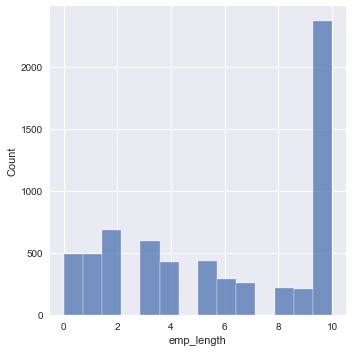

In [1046]:
# emp_length
print('Number of missing values: ',trainDf['emp_length'].isnull().sum())
# Checking for outliers
sns.displot(trainDf.emp_length)

Number of missing values:  14


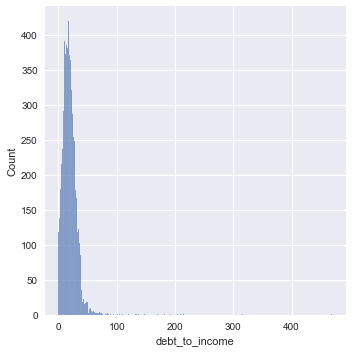

In [1047]:
# dept_to_income
print('Number of missing values: ',trainDf.debt_to_income.isnull().sum())
# Checking for outliers
sns.displot(trainDf.debt_to_income)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='debt_to_income'>

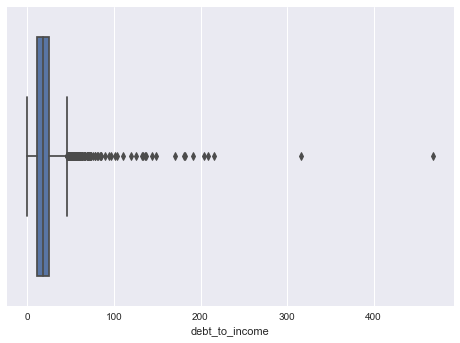

In [1048]:
sns.boxplot(trainDf.debt_to_income)

Number of missing values:  876


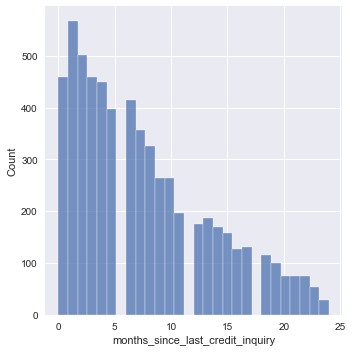

In [1049]:
# 'months_since_last_credit_inquiry'
print('Number of missing values: ',trainDf['months_since_last_credit_inquiry'].isnull().sum())
# Checking for outliers
sns.displot(trainDf.months_since_last_credit_inquiry)

Number of missing values:  217


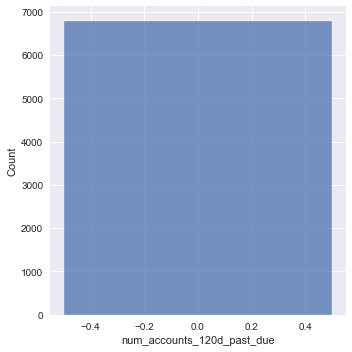

In [1050]:
#'num_accounts_120d_past_due'
print('Number of missing values: ',trainDf['num_accounts_120d_past_due'].isnull().sum())
# Checking for outliers
sns.displot(trainDf.num_accounts_120d_past_due)

In [1051]:
# removing columns num_accounts_120d_past_due
trainDf.drop(['num_accounts_120d_past_due'], axis =1,  inplace=True)

### Removing outliers before impuding NaN values

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

<Figure size 576x396 with 0 Axes>

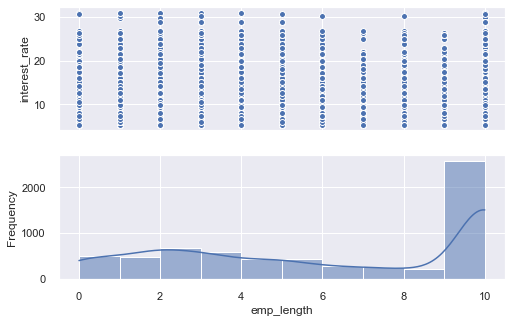

<Figure size 576x360 with 0 Axes>

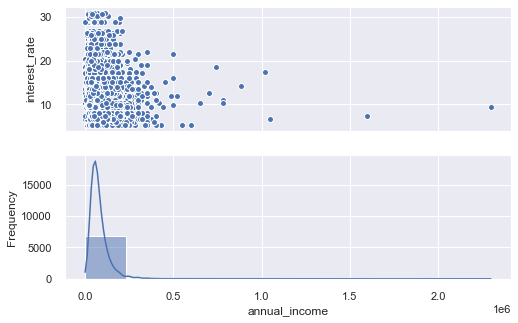

<Figure size 576x360 with 0 Axes>

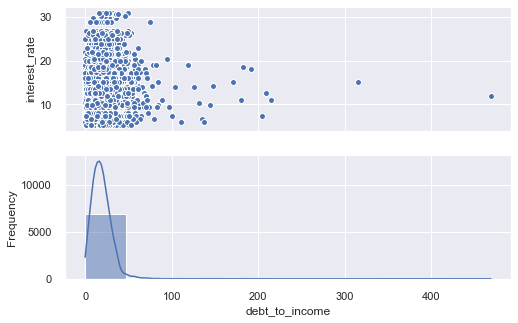

<Figure size 576x360 with 0 Axes>

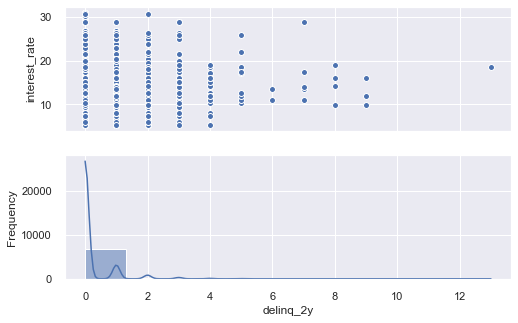

<Figure size 576x360 with 0 Axes>

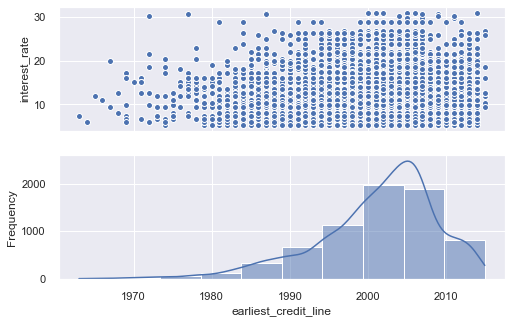

<Figure size 576x360 with 0 Axes>

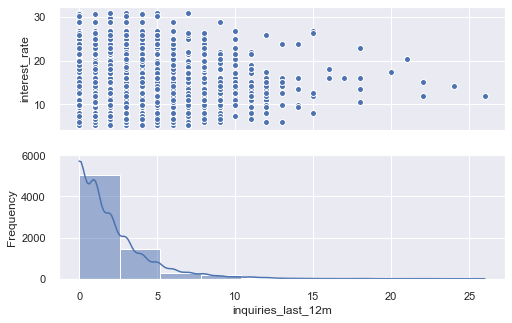

<Figure size 576x360 with 0 Axes>

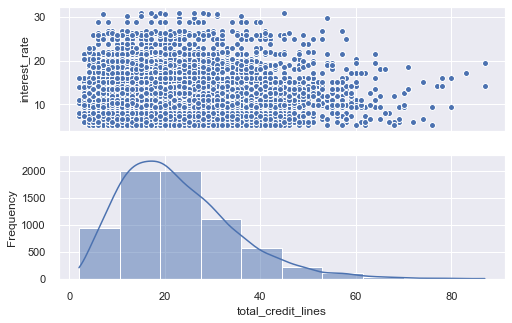

<Figure size 576x360 with 0 Axes>

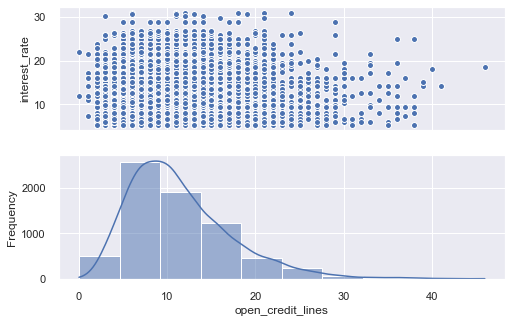

<Figure size 576x360 with 0 Axes>

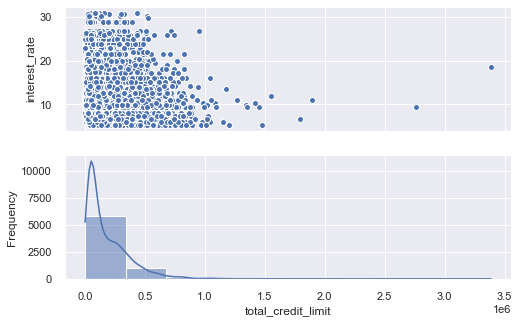

<Figure size 576x360 with 0 Axes>

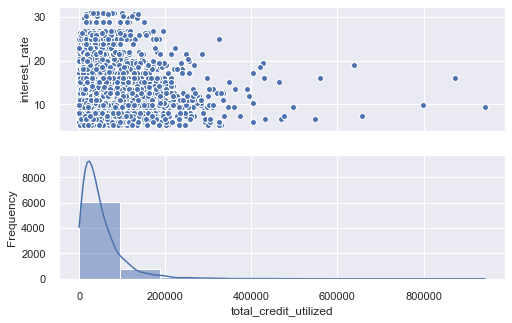

<Figure size 576x360 with 0 Axes>

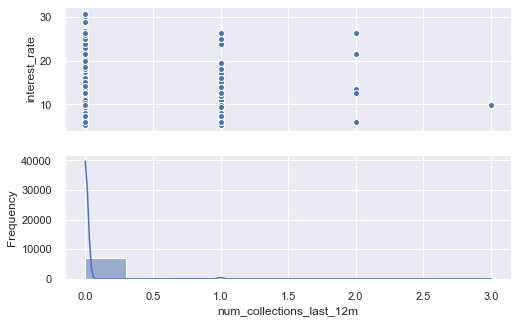

<Figure size 576x360 with 0 Axes>

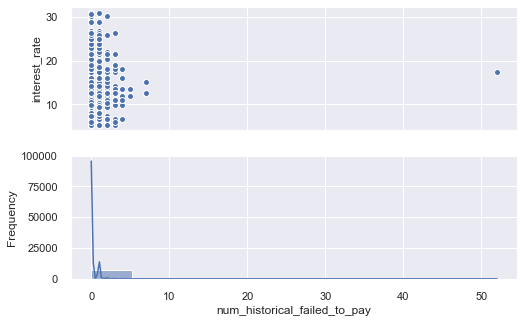

<Figure size 576x360 with 0 Axes>

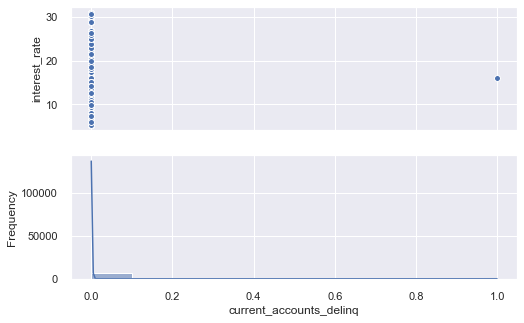

<Figure size 576x360 with 0 Axes>

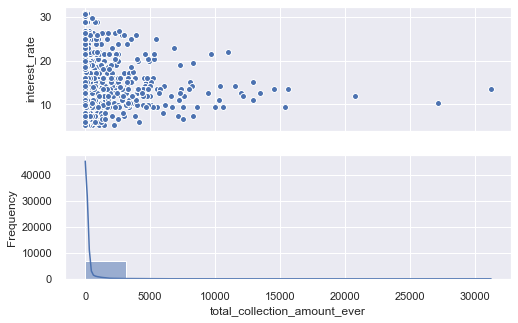

<Figure size 576x360 with 0 Axes>

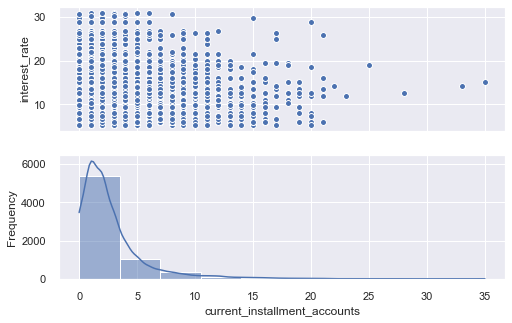

<Figure size 576x360 with 0 Axes>

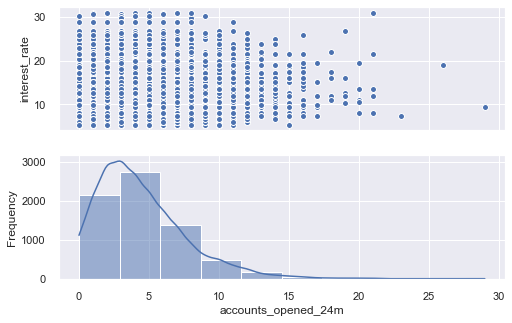

<Figure size 576x360 with 0 Axes>

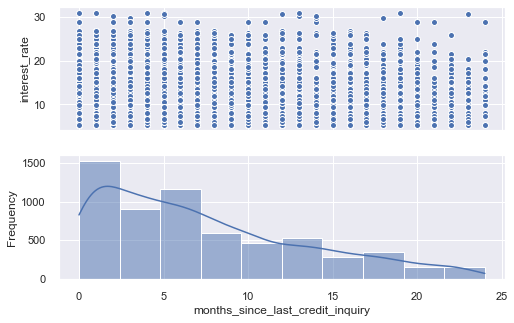

<Figure size 576x360 with 0 Axes>

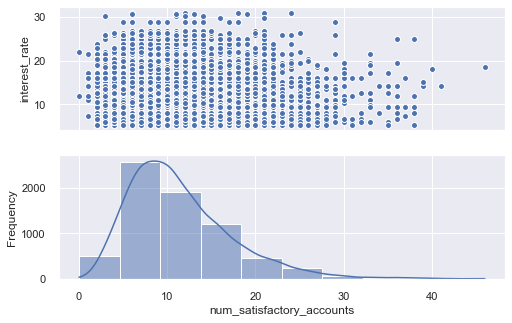

<Figure size 576x360 with 0 Axes>

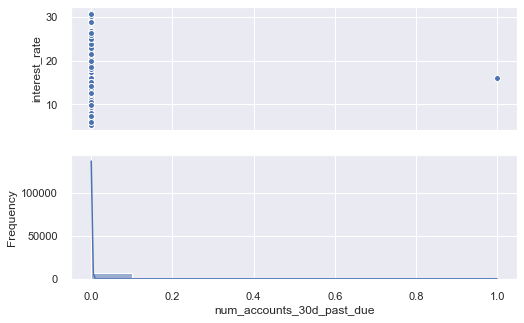

<Figure size 576x360 with 0 Axes>

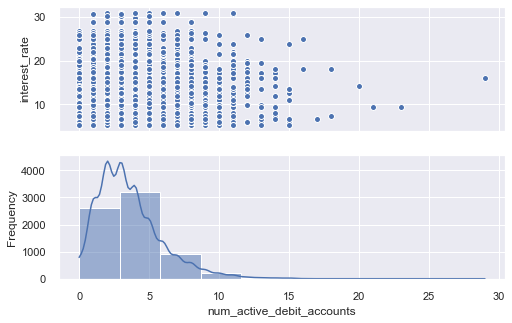

<Figure size 576x360 with 0 Axes>

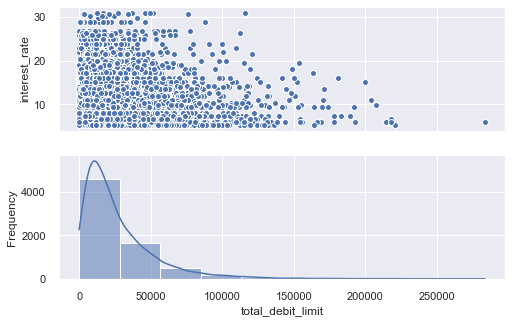

<Figure size 576x360 with 0 Axes>

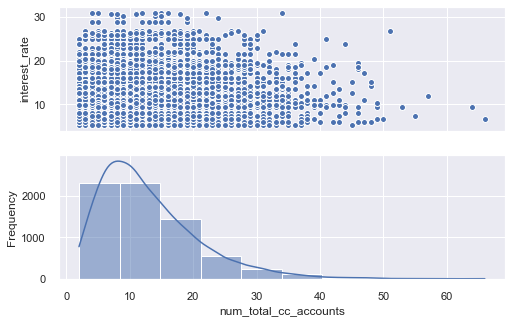

<Figure size 576x360 with 0 Axes>

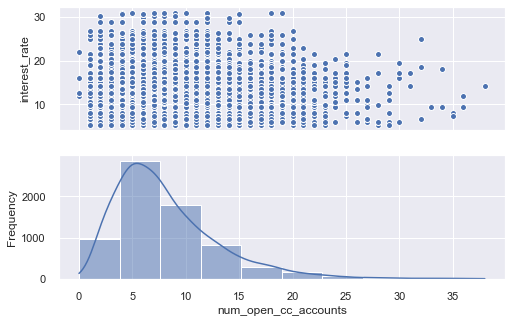

<Figure size 576x360 with 0 Axes>

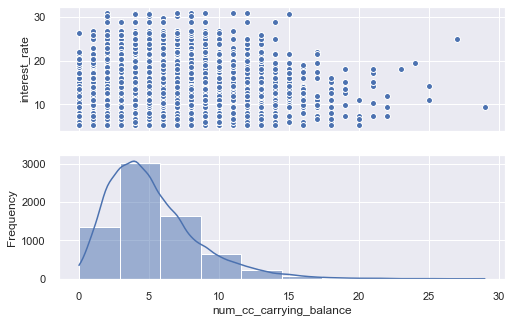

<Figure size 576x360 with 0 Axes>

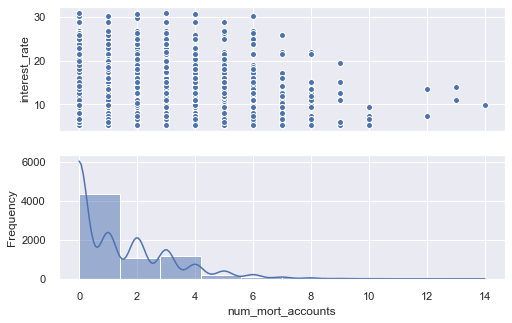

<Figure size 576x360 with 0 Axes>

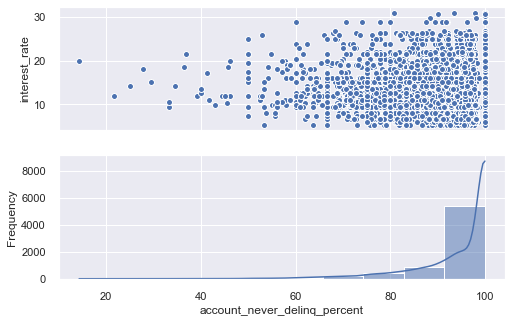

<Figure size 576x360 with 0 Axes>

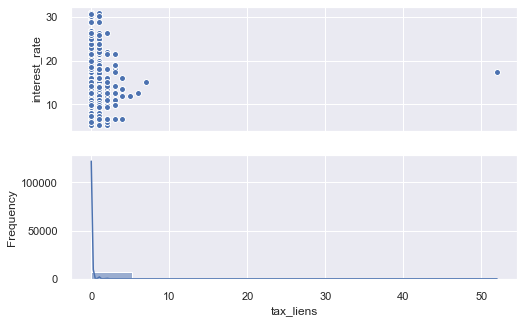

<Figure size 576x360 with 0 Axes>

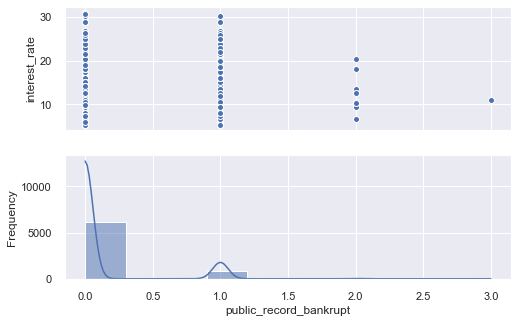

<Figure size 576x360 with 0 Axes>

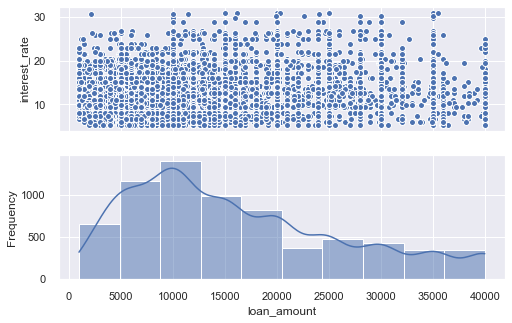

<Figure size 576x360 with 0 Axes>

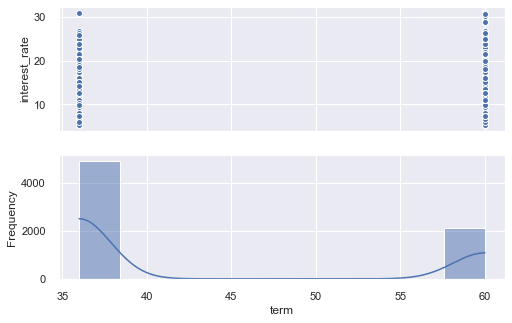

<Figure size 576x360 with 0 Axes>

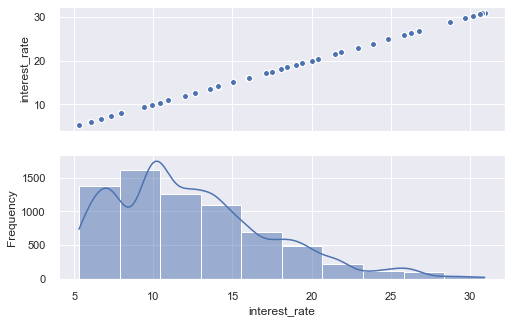

In [1052]:
import matplotlib.pyplot as plt
# a for loop to automate our task--------------
for i in trainDf._get_numeric_data().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i, ylabel='Frequency')
    sns.scatterplot(trainDf[i],trainDf.interest_rate, ax=ax_box , linewidth= 1.0)
    sns.histplot(trainDf[i], ax=ax_hist , bins = 10,kde=True)

In [1053]:
# For loop for maximum value -removing rows
columns = ['total_credit_utilized','num_collections_last_12m','num_historical_failed_to_pay','accounts_opened_24m','num_accounts_30d_past_due',
        'num_active_debit_accounts','total_debit_limit','tax_liens','public_record_bankrupt']

for column in columns:
    trainDf = trainDf[~(trainDf[column] == trainDf[column].max())]
    

# For loop to rmove ouliers based on value - removing rows
trainDf = trainDf[~(trainDf['debt_to_income'] >= 300)]
trainDf = trainDf[~(trainDf['delinq_2y'] >= 12)]
trainDf = trainDf[~(trainDf['total_credit_limit'] >= 2000000)]
trainDf = trainDf[~(trainDf['open_credit_lines'] >= 43)]
trainDf = trainDf[~(trainDf['total_collection_amount_ever'] >= 20000)]
trainDf = trainDf[~(trainDf['current_installment_accounts'] >= 30)]
trainDf = trainDf[~(trainDf['current_installment_accounts'] >= 20000)]
trainDf = trainDf[~(trainDf['annual_income'] >= 1500000)]

In [1054]:
# removing row with only zero values - num_accounts_30d_past_due,current_accounts_delinq
trainDf.drop(columns= ['num_accounts_30d_past_due','current_accounts_delinq'], axis =1, inplace = True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

<Figure size 576x360 with 0 Axes>

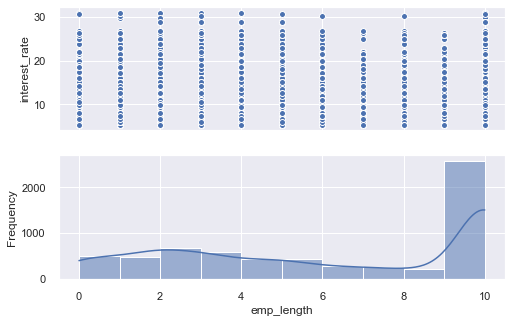

<Figure size 576x360 with 0 Axes>

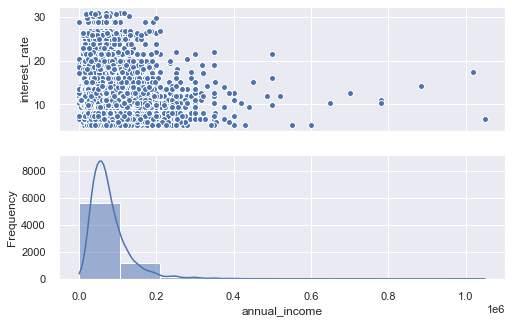

<Figure size 576x360 with 0 Axes>

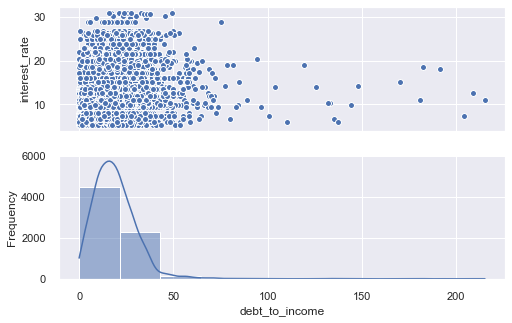

<Figure size 576x360 with 0 Axes>

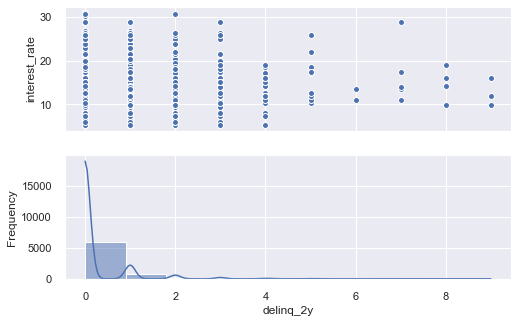

<Figure size 576x360 with 0 Axes>

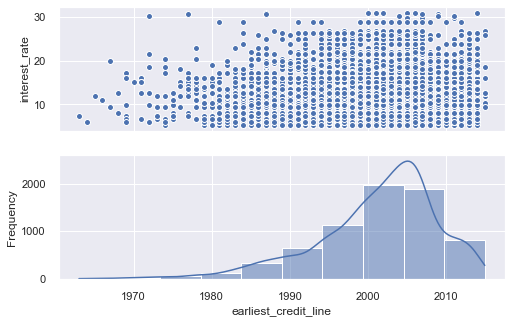

<Figure size 576x360 with 0 Axes>

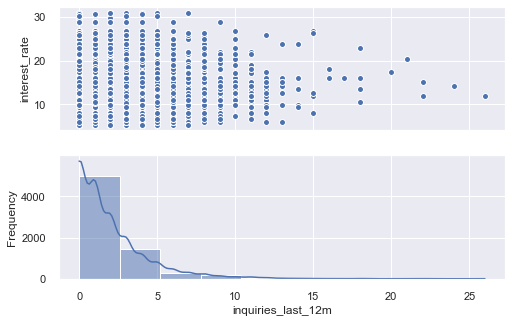

<Figure size 576x360 with 0 Axes>

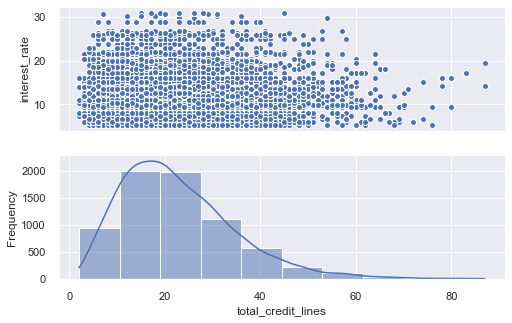

<Figure size 576x360 with 0 Axes>

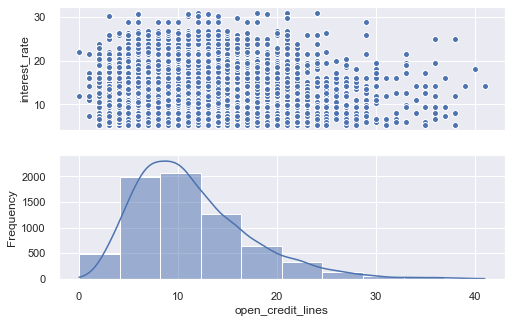

<Figure size 576x360 with 0 Axes>

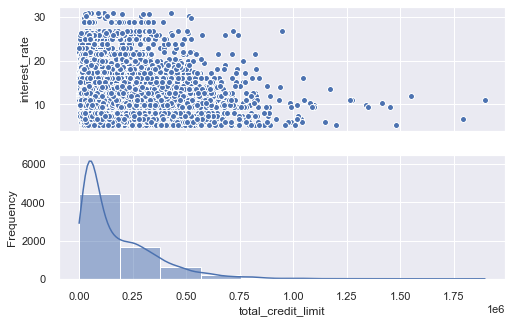

<Figure size 576x360 with 0 Axes>

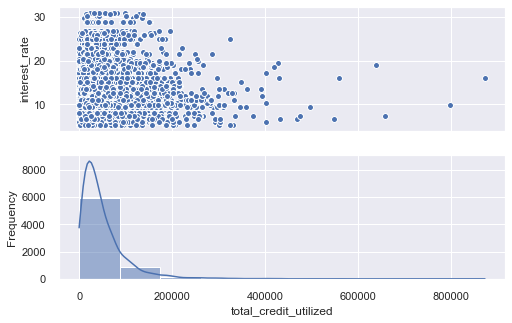

<Figure size 576x360 with 0 Axes>

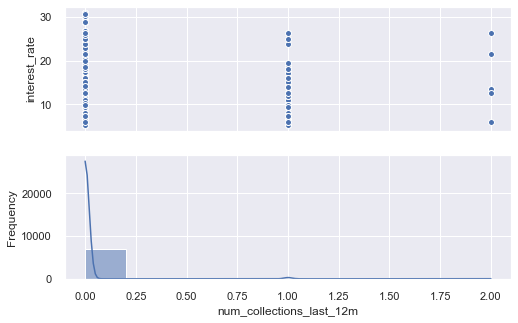

<Figure size 576x360 with 0 Axes>

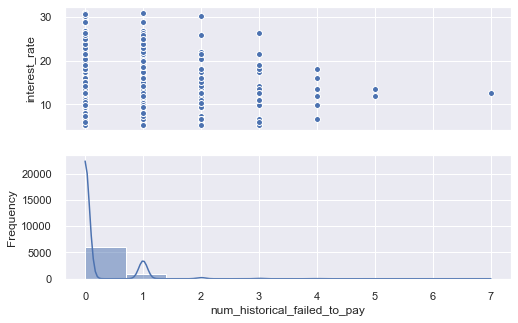

<Figure size 576x360 with 0 Axes>

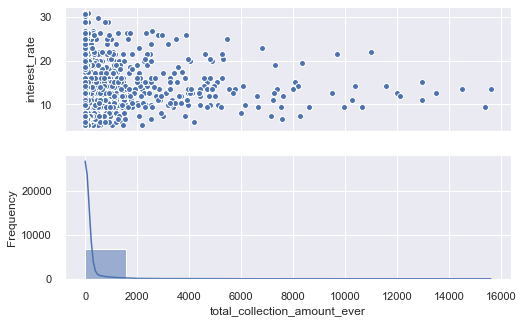

<Figure size 576x360 with 0 Axes>

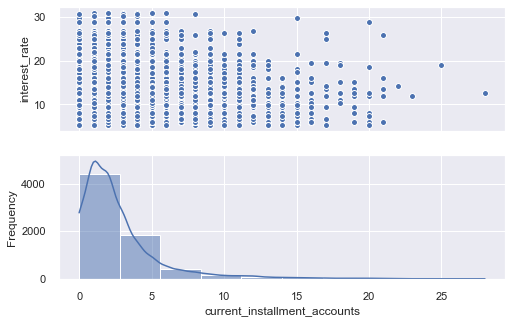

<Figure size 576x360 with 0 Axes>

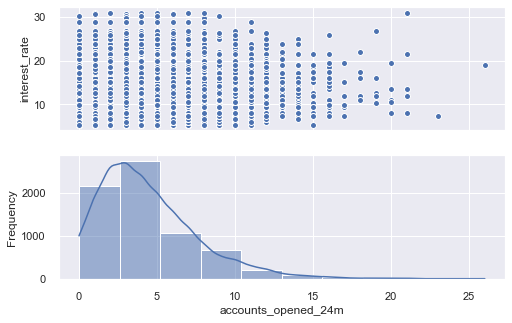

<Figure size 576x360 with 0 Axes>

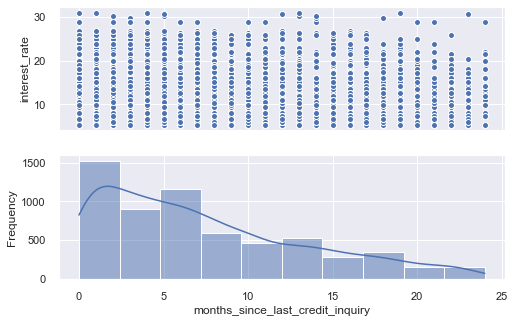

<Figure size 576x360 with 0 Axes>

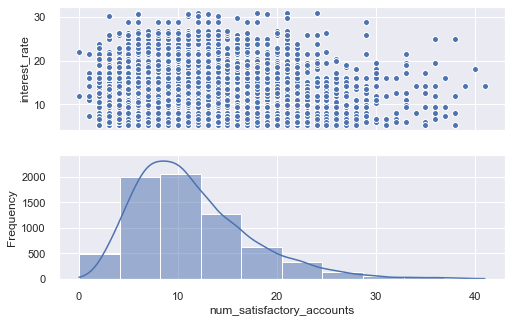

<Figure size 576x360 with 0 Axes>

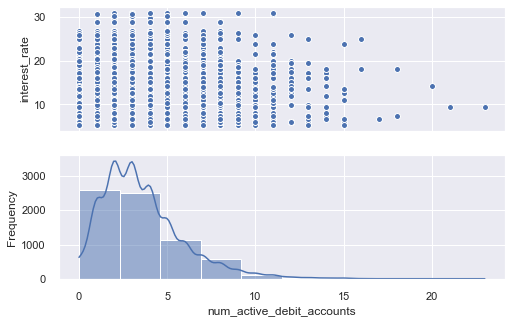

<Figure size 576x360 with 0 Axes>

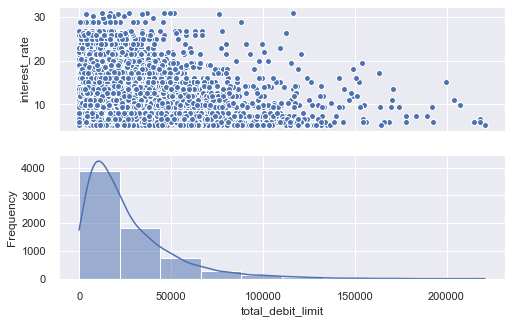

<Figure size 576x360 with 0 Axes>

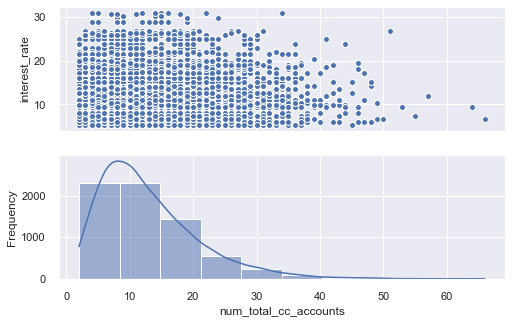

<Figure size 576x360 with 0 Axes>

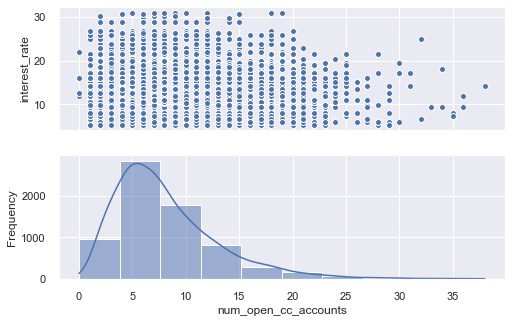

<Figure size 576x360 with 0 Axes>

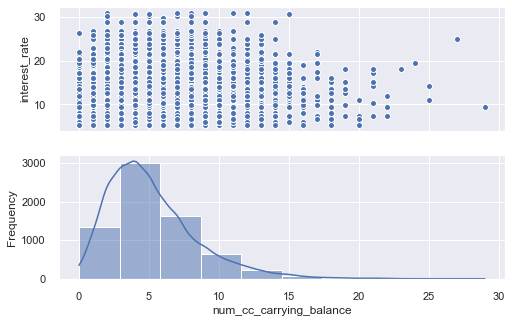

<Figure size 576x360 with 0 Axes>

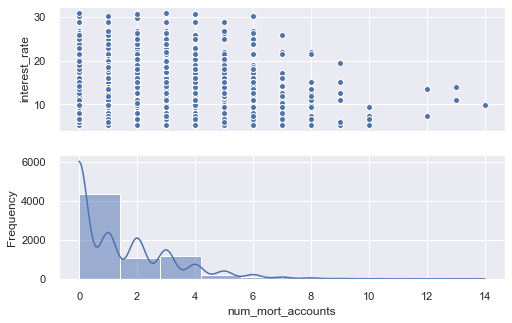

<Figure size 576x360 with 0 Axes>

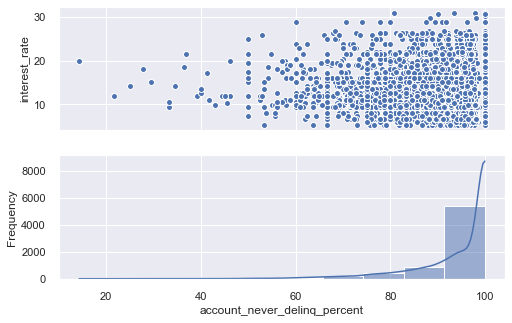

<Figure size 576x360 with 0 Axes>

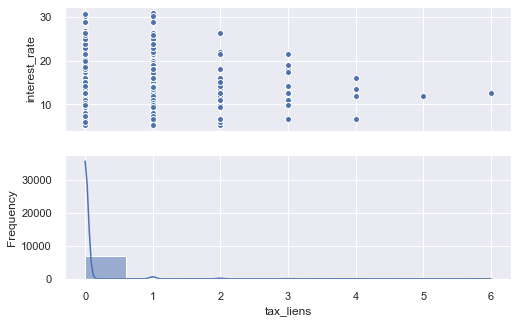

<Figure size 576x360 with 0 Axes>

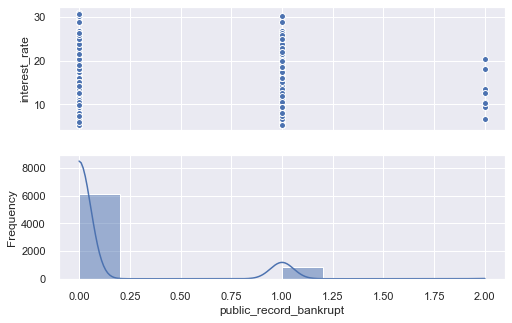

<Figure size 576x360 with 0 Axes>

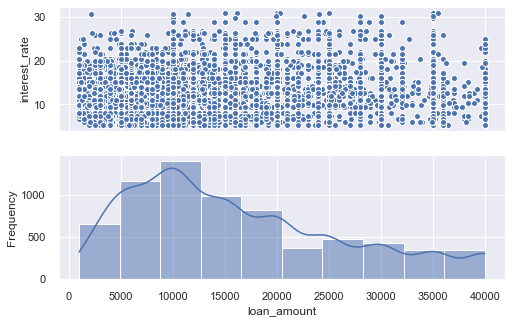

<Figure size 576x360 with 0 Axes>

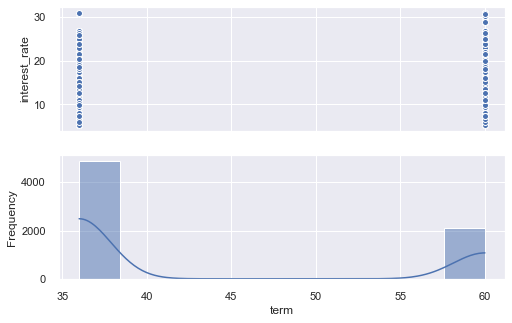

<Figure size 576x360 with 0 Axes>

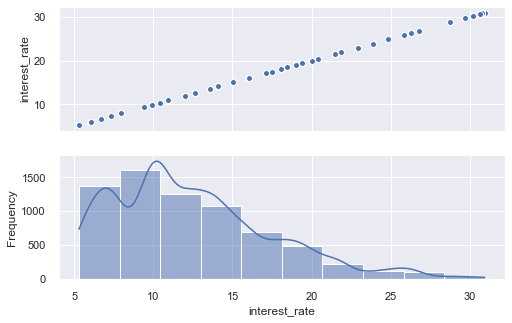

In [1055]:
import matplotlib.pyplot as plt
# a for loop to automate our task--------------
for i in trainDf._get_numeric_data().columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i, ylabel='Frequency')
    sns.scatterplot(trainDf[i],trainDf.interest_rate, ax=ax_box , linewidth= 1.0)
    sns.histplot(trainDf[i], ax=ax_hist , bins = 10,kde=True)

In [1056]:
trainDf.columns[trainDf.isna().any()].tolist()

['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry']

### emp_length

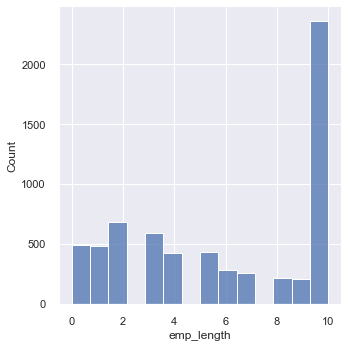

In [1057]:
# Imputing values using "Simple Imputer"
from sklearn.impute import SimpleImputer
sns.displot(trainDf.emp_length)

In [1058]:
# Replace NaN values using mode , because skewed and discrete 
mode_imputer_emp_length = SimpleImputer(strategy = 'most_frequent')
trainDf.emp_length = mode_imputer_emp_length.fit_transform(trainDf.emp_length.values.reshape(-1,1))

### dept_to_income

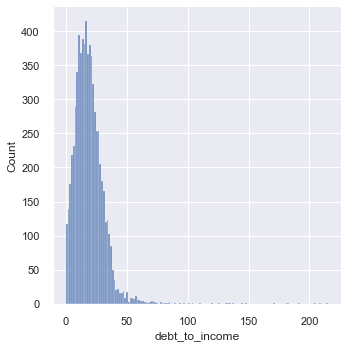

In [1059]:
# Imputing values using "Simple Imputer"
from sklearn.impute import SimpleImputer
sns.displot(trainDf.debt_to_income)

In [1079]:
# Replace NaN values using median ,continuous and skewed
mode_imputer_debt_to_income = SimpleImputer(strategy = 'median')
trainDf.debt_to_income = mode_imputer_debt_to_income.fit_transform(trainDf.debt_to_income.values.reshape(-1,1))

### months_since_last_credit_inquiry

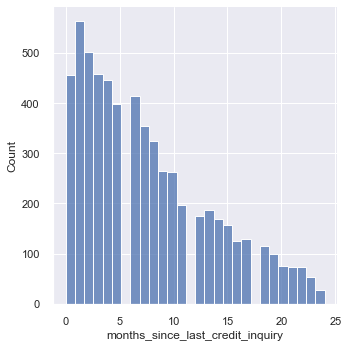

In [1081]:
# Imputing values using "Simple Imputer"
sns.displot(trainDf.months_since_last_credit_inquiry)

In [1082]:
# Replace NaN values using mode ,discrete
median_imputer_months_since_last_credit_inquiry= SimpleImputer(strategy = 'median')
trainDf.months_since_last_credit_inquiry = median_imputer_months_since_last_credit_inquiry.fit_transform(trainDf.months_since_last_credit_inquiry.values.reshape(-1,1))

In [1083]:
trainDf.columns[trainDf.isna().any()]

Index([], dtype='object')

# Data Cleaning

### one hot encoding categorical data

In [1084]:
trainDf.columns

Index(['homeownership', 'annual_income', 'verified_income', 'debt_to_income',
       'delinq_2y', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [1085]:
trainDf.select_dtypes('object').columns[1:]

Index(['verified_income', 'loan_purpose', 'application_type',
       'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [1086]:
df = trainDf.copy()

In [1087]:
trainDf.drop(columns =['state','earliest_credit_line','emp_length','tax_liens'], axis = 1, inplace= True )

KeyError: "['state' 'earliest_credit_line' 'emp_length' 'tax_liens'] not found in axis"

In [1088]:
one_hot_encoded_data = pd.get_dummies(trainDf, columns = trainDf.select_dtypes('object').columns)

In [1089]:
# removing dedundant dummy variables,
redundantDummyVariable = ['homeownership_MORTGAGE','loan_purpose_car','verified_income_Verified','initial_listing_status_fractional',
                            'disbursement_method_DirectPay','application_type_joint']

one_hot_encoded_data = one_hot_encoded_data.drop(columns= redundantDummyVariable, axis = 1)

# Modelling

## train and test split

In [1090]:
from sklearn.model_selection import train_test_split
y = one_hot_encoded_data['interest_rate']
X = one_hot_encoded_data.drop('interest_rate', axis =1)

# # X = trainDf.drop("interest_rate", axis =1)
# X = trainDf[trainDf._get_numeric_data().columns[:-1]]
# y = trainDf['interest_rate']

# Normalising
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1091]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [1092]:
# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=10)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [1093]:
X_train_fs.shape

(6282, 10)

In [1094]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))

scipy MSE: 20.617764
scipy RMSE: 4.540679


In [1095]:
# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))
r2_score(y_test,y_pred )

scipy MSE: 16.041053
scipy RMSE: 4.005128


0.36366477022455435

In [1096]:
# import xgboost as xgb

# regressor=xgb.XGBRegressor(eval_metric='rmsle')
# from sklearn.model_selection import GridSearchCV
# # set up our search grid
# param_grid = {"max_depth":    [4, 5],
#               "n_estimators": [500, 600, 700],
#               "learning_rate": [0.01, 0.015]}

# # try out every combination of the above values
# search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

# print("The best hyperparameters are ",search.best_params_)


In [1097]:
# regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                            n_estimators  = search.best_params_["n_estimators"],
#                            max_depth     = search.best_params_["max_depth"],)
import xgboost as xgb
from sklearn.metrics import r2_score
regressor=xgb.XGBRegressor(eval_metric='rmse')

regressor=xgb.XGBRegressor(max_depth = 5, learning_rate =0.01,n_estimators=3500, booster = 'gbtree')
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1098]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print('scipy MSE: {:.6f}'.format(mse))
print('scipy RMSE: {:.6f}'.format(rmse))
r2_score(y_test,y_pred )

scipy MSE: 14.154705
scipy RMSE: 3.762274


0.4384946288241911

In [858]:
X_train.shape

(6282, 41)

In [ ]:
testDf = pd.read_csv('loans_test_data.csv')
# Dropping column ID
testDf.drop(['id'], axis =1, inplace=True)
testDf.drop(['emp_title'], axis =1,  inplace=True)
print(testDf.shape)

# Converting Source Verified to Verfied in column verified_income
testDf['verified_income'][testDf.verified_income == 'Source Verified'] = "Verified"
trainDf['verified_income'][trainDf.verified_income == 'Not Verified'] = "Not_Verified"
testDf['verification_income_joint'][testDf.verification_income_joint == 'Source Verified'] = "Verified"

#  Selecting all the columns with more than 50% of null values
testDf.drop(colToRemove, axis =1,  inplace=True)


# removing columns num_accounts_120d_past_due
testDf.drop(['num_accounts_120d_past_due'], axis =1,  inplace=True)

# removing row with only zero values - num_accounts_30d_past_due,current_accounts_delinq
testDf.drop(columns= ['num_accounts_30d_past_due','current_accounts_delinq'], axis =1, inplace = True)


# Imputing values using "Simple Imputer"
from sklearn.impute import SimpleImputer

# Replace NaN values using mode , because skewed and discrete 
testDf.emp_length = mode_imputer_emp_length.transform(testDf.emp_length.values.reshape(-1,1))



# Replace NaN values using median ,continuous and skewed

testDf.debt_to_income = median_imputer_debt_to_income.transform(testDf.debt_to_income.values.reshape(-1,1))


# Replace NaN values using mode ,discrete

testDf.months_since_last_credit_inquiry = median_imputer_months_since_last_credit_inquiry.transform(testDf.months_since_last_credit_inquiry.values.reshape(-1,1))



# Data Cleaning
testDf.drop(columns =['state','earliest_credit_line','emp_length'], axis = 1, inplace= True )

one_hot_encoded_data_test = pd.get_dummies(testDf, columns = testDf.select_dtypes('object').columns)



one_hot_encoded_data_test.verified_income_Verified.value_counts()

# removing dedundant dummy variables
redundantDummyVariable = ['verified_income_Verified','homeownership_MORTGAGE','loan_purpose_car','application_type_joint','initial_listing_status_fractional',
                            'disbursement_method_DirectPay']

one_hot_encoded_data_test= one_hot_encoded_data_test.drop(columns= redundantDummyVariable, axis = 1)

one_hot_encoded_data_test = scaler.transform(one_hot_encoded_data_test)

In [ ]:
y_pred = regressor.predict(one_hot_encoded_data_test)

In [ ]:
y_pred = np.round(y_pred,2)

In [ ]:
y_preds = pd.DataFrame(y_pred)
y_preds.rename(columns={0:'interest_rate'},inplace=True)
y_preds.head()

In [ ]:
y_preds.index +=7001
y_preds.to_csv('submission.csv', index_label='id')

In [ ]:
y_preds.shape